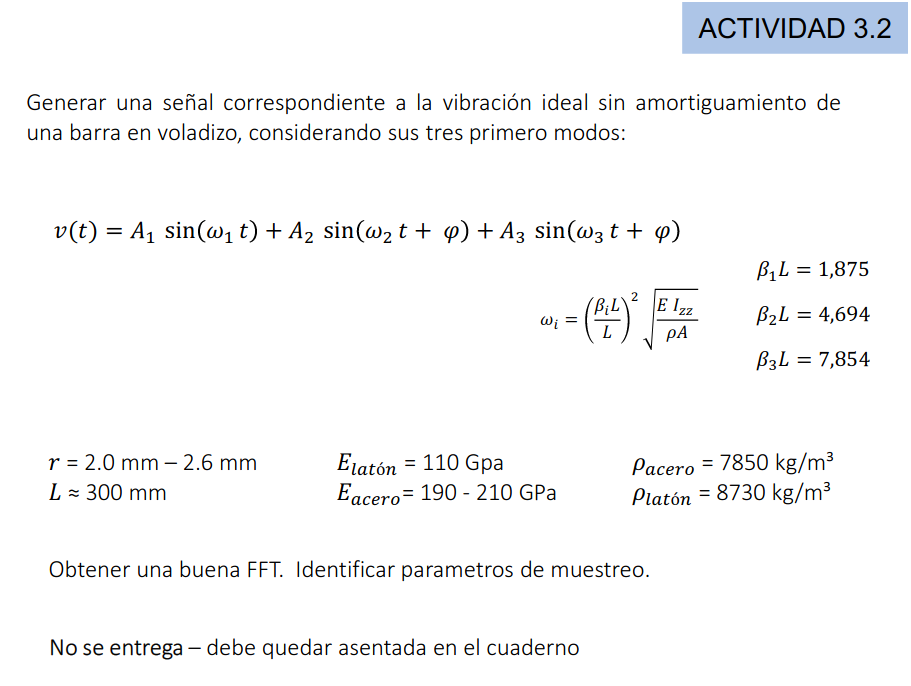

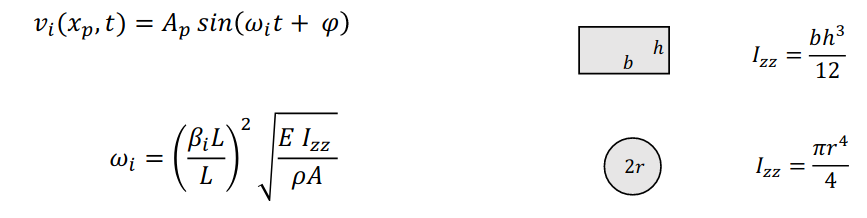

In [173]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pint
#import sympy.physics.units as un
%matplotlib nbagg

un = pint.UnitRegistry()
Q = un.Quantity 

E_laton = 110e9 * un.pascal #Pa
E_acero = 210e9 * un.pascal #Pa
ro_acero = 7850 * un.kilogram / un.meter**3 #kg/m³
ro_laton = 8730 * un.kilogram / un.meter**3 #kg/m³
L = 300 * un.millimeter

lado_rec = 0.04 * un.meter
alto_rec = 0.00 * un.meter
I_rec = lado_rec * alto_rec**3 / 12
A = lado_rec * alto_rec

radio_vara = 0.0023 * un.meter
seccion_vara = np.pi* radio_vara**2
I_vara = np.pi * radio_vara**4 / 4


b_ls = [1.875, 4.694, 7.854]

ws_laton = []
ws_acero = []

for bl in b_ls:
    num_lat = bl**2 * np.sqrt(E_laton * I_vara)
    den_lat = L**2 * np.sqrt(ro_laton * seccion_vara)
    num_ac = bl**2 * np.sqrt(E_acero * I_vara)
    den_ac = L**2  * np.sqrt(ro_acero * seccion_vara)
    ws_laton.append(num_lat/den_lat)
    ws_acero.append(num_ac/den_ac)

for index in range(len(ws_laton)):
    print("\ncon beta =", b_ls[index], "\nfrecuencia latón:", ws_laton[index].to(1/un.second), "\nfrecuencia acero:", ws_acero[index].to(1/un.second))



con beta = 1.875 
frecuencia latón: 159.4582875312418 / second 
frecuencia acero: 232.3446592183624 / second

con beta = 4.694 
frecuencia latón: 999.380157055067 / second 
frecuencia acero: 1456.1842198076988 / second

con beta = 7.854 
frecuencia latón: 2797.8623588077544 / second 
frecuencia acero: 4076.7299483867023 / second


In [182]:
def v(t, A, w, fi):
    v = np.zeros(t.size)
    for i in range(len(A)):
        v = v + A[i] * np.sin(w[i] * t + fi[i]) 
    return v
tstep = 0.00001
t = np.linspace(0, 1, int(1/tstep)) * un.second
fi = [0.2,0.1,0.5] * un.radian
A = [1,0.5,0.05] * un.volts
w = ws_laton
v = v(t, A, w, fi)


<IPython.core.display.Javascript object>


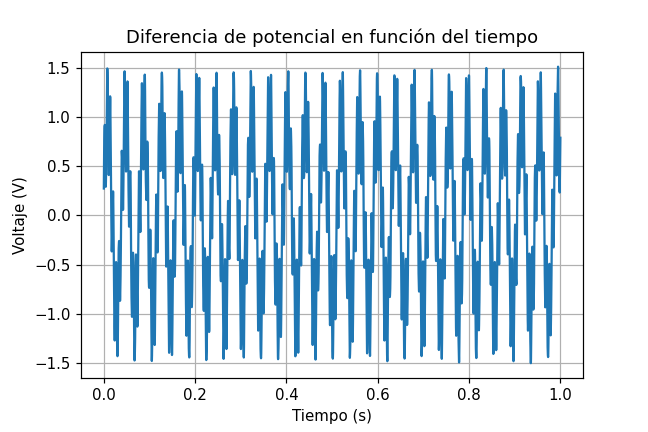

99999.99999999999


C:\Users\tomas\Anaconda3\envs\labo-4\lib\site-packages\numpy\core\_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


In [183]:
fig, ax = plt.subplots(1)
ax.plot(t, v)
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Voltaje (V)")
ax.grid()
ax.set_title("Diferencia de potencial en función del tiempo")
plt.show()
print(1/tstep)

[0.00000e+00 1.00002e+00 2.00004e+00 ... 9.99980e+04 9.99990e+04
 1.00000e+05] 99999


<ipython-input-189-5f93901619aa>:1: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v_fft = np.fft.fft(np.array(v))


<IPython.core.display.Javascript object>


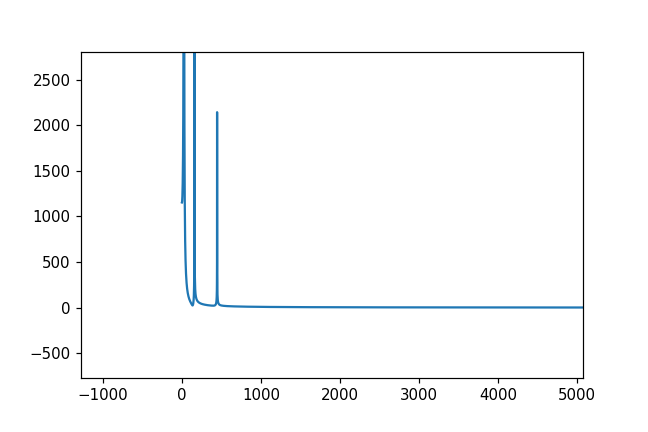

TypeError: '>' not supported between instances of 'float' and 'AxesSubplot'

In [189]:
v_fft = np.fft.fft(np.array(v))


f = np.linspace(0, 1/(tstep), v_fft.size) 
print(f, f.size)

fig, ax = plt.subplots(1)
ax.plot(f, np.abs(v_fft))
ax.axvline(ax, w[0])
ax.grid()
plt.show()